In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from prophet import Prophet

In [2]:
data = pd.read_csv('Chicago_Crime_Data-v2.csv')
data.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [3]:
# for col in data.columns:
#     print(col)
data.columns

Index(['ID', 'CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT',
       'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'UPDATEDON', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [4]:
col1 = data.iloc[:,1:11]
col1.head(10)

,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT
0,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911
1,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112
2,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221
3,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423
4,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831
5,HS540106,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,1323
6,HZ534771,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,False,False,1713
7,HL793243,12/16/2005 04:45:00 PM,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,213
8,HL149610,01/28/2005 05:00:00 PM,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,False,False,2211
9,HK361551,05/13/2004 02:15:00 PM,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False,1733


In [5]:
col2 = data.iloc[:,11:22]
col2.head(5)

,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [6]:
col1.isna().sum()

CASE_NUMBER             0
DATE                    0
BLOCK                   0
IUCR                    0
PRIMARY_TYPE            0
DESCRIPTION             0
LOCATION_DESCRIPTION    0
ARREST                  0
DOMESTIC                0
BEAT                    0
dtype: int64

In [7]:
col2.isna().sum()

DISTRICT                  0
WARD                     43
COMMUNITY_AREA_NUMBER    43
FBICODE                   0
X_COORDINATE              4
Y_COORDINATE              4
YEAR                      0
UPDATEDON                 0
LATITUDE                  4
LONGITUDE                 4
LOCATION                  4
dtype: int64

In [8]:
data.drop(columns=['WARD'],inplace=True)

In [9]:
data.drop(columns=['COMMUNITY_AREA_NUMBER'],inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    533 non-null    int64  
 1   CASE_NUMBER           533 non-null    object 
 2   DATE                  533 non-null    object 
 3   BLOCK                 533 non-null    object 
 4   IUCR                  533 non-null    object 
 5   PRIMARY_TYPE          533 non-null    object 
 6   DESCRIPTION           533 non-null    object 
 7   LOCATION_DESCRIPTION  533 non-null    object 
 8   ARREST                533 non-null    bool   
 9   DOMESTIC              533 non-null    bool   
 10  BEAT                  533 non-null    int64  
 11  DISTRICT              533 non-null    int64  
 12  FBICODE               533 non-null    object 
 13  X_COORDINATE          529 non-null    float64
 14  Y_COORDINATE          529 non-null    float64
 15  YEAR                  5

In [11]:
data.set_index(data.ID).head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
ID,,,,,,,,,,,,,,,,,,,,
3512276,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807440,-87.703956,"(41.8074405, -87.703955849)"
3406613,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112,11,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
8002131,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
7903289,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
10402076,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831,8,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [12]:
data.describe(include='all')

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
count,5.330000e+02,533,533,533,533,533,533,533,533,533,533.000000,533.000000,533,5.290000e+02,5.290000e+02,533.00000,533,529.000000,529.000000,529
unique,NaN,533,532,518,112,35,103,48,2,2,NaN,NaN,23,NaN,NaN,NaN,10,NaN,NaN,525
top,NaN,HK587712,03/02/2009 09:10:00 PM,071XX S MICHIGAN AVE,820,THEFT,SIMPLE,STREET,False,False,NaN,NaN,6,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.754592961, -87.741528537)"
freq,NaN,1,2,2,48,106,59,136,370,454,NaN,NaN,106,NaN,NaN,NaN,226,NaN,NaN,2
mean,6.228301e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1187.037523,11.195122,NaN,1.162876e+06,1.886223e+06,2008.34334,NaN,41.843429,-87.677818,NaN
std,3.027454e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.592263,6.496631,NaN,1.650197e+04,3.009980e+04,4.94940,NaN,0.082798,0.060073,NaN
min,2.114900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,1.000000,NaN,1.100658e+06,1.814512e+06,2001.00000,NaN,41.645796,-87.905227,NaN
25%,3.420516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.000000,6.000000,NaN,1.151715e+06,1.860454e+06,2004.00000,NaN,41.772556,-87.718166,NaN
50%,6.231712e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.000000,10.000000,NaN,1.163235e+06,1.891447e+06,2008.00000,NaN,41.857737,-87.676733,NaN
75%,8.875058e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1634.000000,16.000000,NaN,1.174618e+06,1.907711e+06,2012.00000,NaN,41.902298,-87.634677,NaN


<AxesSubplot:>

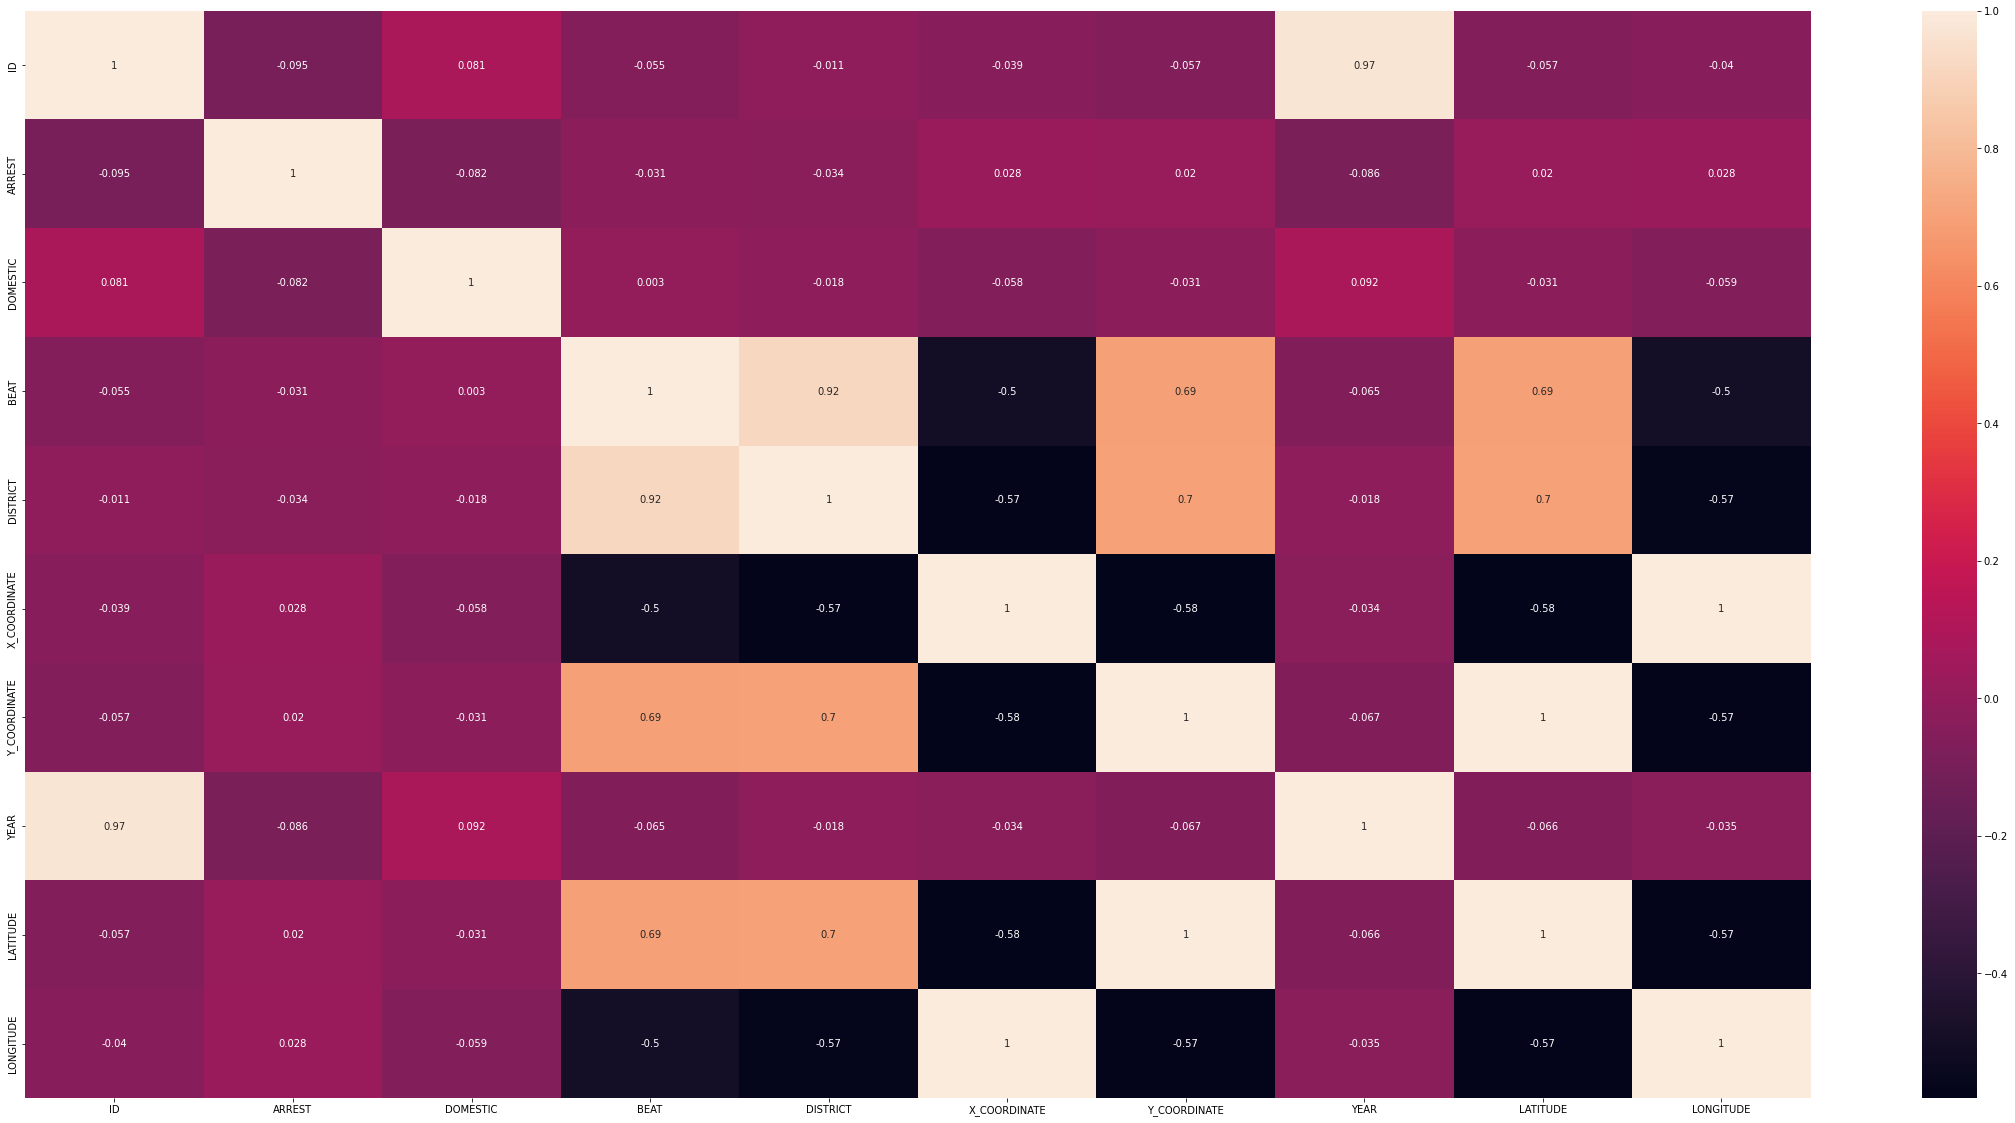

In [13]:
fig = plt.figure(figsize =(40,20))
sb.heatmap(data.corr(),annot=True)

In [14]:
rel_data = data.iloc[:,[2,3,4,5,6,7,8,12,13,14]]
rel_data.head()

,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,FBICODE,X_COORDINATE,Y_COORDINATE
0,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,6,1155838.0,1873050.0
1,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,6,1152206.0,1906127.0
2,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,6,1177436.0,1876313.0
3,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,6,1194622.0,1850125.0
4,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,6,1155240.0,1860661.0


In [15]:
# check the number of unique values for all the objects
rel_data.select_dtypes(include='object').nunique()

DATE                    532
BLOCK                   518
IUCR                    112
PRIMARY_TYPE             35
DESCRIPTION             103
LOCATION_DESCRIPTION     48
FBICODE                  23
dtype: int64

In [16]:
# NUMBER OF CRIMES BY PRIMARY TYPE
crime_count = rel_data['PRIMARY_TYPE'].value_counts().head(20)
crime_count

THEFT                               106
BATTERY                              92
CRIMINAL DAMAGE                      58
NARCOTICS                            54
OTHER OFFENSE                        32
ASSAULT                              32
BURGLARY                             30
MOTOR VEHICLE THEFT                  24
ROBBERY                              20
DECEPTIVE PRACTICE                   20
CRIMINAL TRESPASS                    15
PROSTITUTION                          6
WEAPONS VIOLATION                     6
PUBLIC PEACE VIOLATION                5
OFFENSE INVOLVING CHILDREN            4
CRIM SEXUAL ASSAULT                   3
SEX OFFENSE                           3
ARSON                                 2
HOMICIDE                              2
INTERFERENCE WITH PUBLIC OFFICER      2
Name: PRIMARY_TYPE, dtype: int64

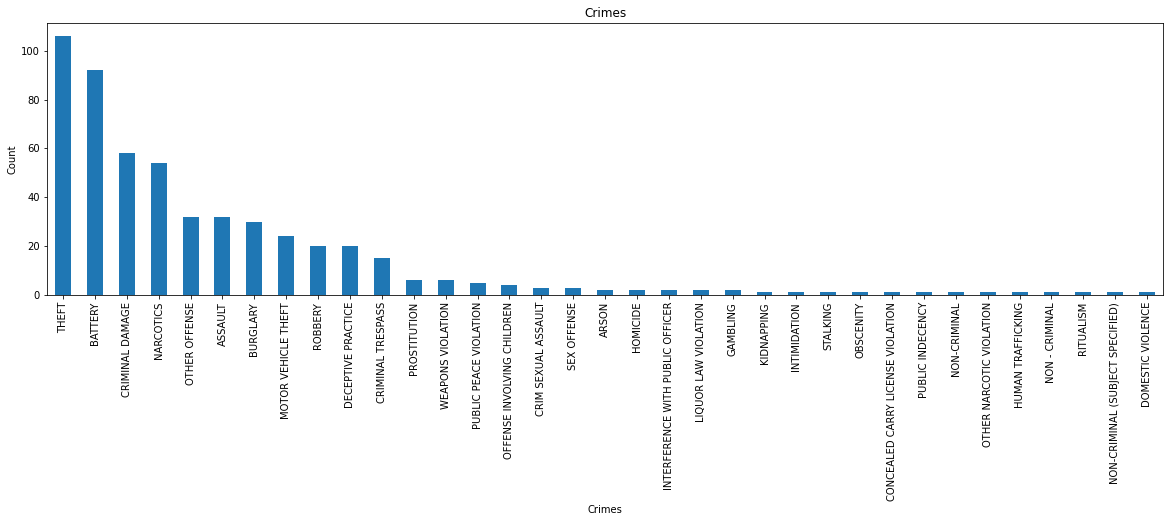

In [17]:
plt.figure(figsize=(20,5))
rel_data["PRIMARY_TYPE"].value_counts().plot.bar()
plt.title("Crimes")
plt.xlabel("Crimes")
plt.ylabel("Count")
plt.show()

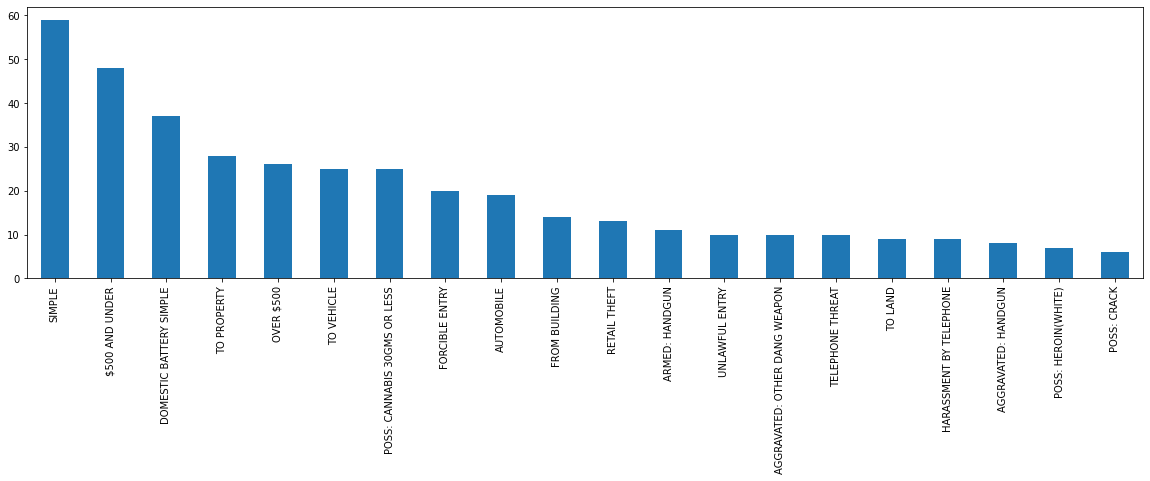

In [18]:
# NUMBER OF CRIMES BASED ON DESCRIPTION

plt.figure(figsize=(20,5))
rel_data["DESCRIPTION"].value_counts()[:20].plot.bar()
plt.show()

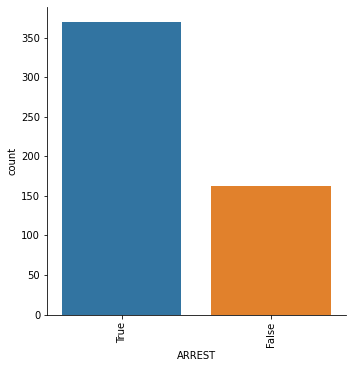

In [19]:
# ARREST AND NON-ARREST COUNT

g = sb.catplot(x='ARREST',kind='count',data=rel_data)
g.set_xticklabels(labels=[True,False], rotation=90)

In [20]:


arrest_count=0
non_arrest_count=0
def fn_barplot(rel_data,col):
    if data[col].dtype in ['object']:
        fig,((ax1,ax2)) = plt.subplots(2,1,figsize=(10,10))
        plt_df = rel_data[['ARREST',col]].dropna()
        plt1 = plt_df.loc[plt_df['ARREST']==True]
        print(plt1)
        plt2 = plt_df.loc[plt_df['ARREST']==False]
        arrest_count = plt1.value_counts()
        non_arrest_count = plt2.value_counts()
        print(arrest_count.head(10))
        print()
        print(non_arrest_count.head(10))

        plt1.groupby(col)[col].count().nlargest(10).plot(kind="barh",ax=ax1,title="Arrest  : " +col)
        plt2.groupby(col)[col].count().nlargest(10).plot(kind="barh",ax=ax2,title="NO Arrest  : " +col)

    return plt.show()
print(arrest_count)

0


     ARREST                       PRIMARY_TYPE
7      True                              THEFT
10     True                              THEFT
16     True                              THEFT
20     True                              THEFT
23     True                              THEFT
..      ...                                ...
523    True                          OBSCENITY
524    True  CONCEALED CARRY LICENSE VIOLATION
525    True                   PUBLIC INDECENCY
527    True           OTHER NARCOTIC VIOLATION
532    True                  DOMESTIC VIOLENCE

[163 rows x 2 columns]
ARREST  PRIMARY_TYPE      
True    NARCOTICS             53
        BATTERY               20
        THEFT                 15
        CRIMINAL TRESPASS     13
        ASSAULT                9
        OTHER OFFENSE          7
        PROSTITUTION           6
        CRIMINAL DAMAGE        6
        DECEPTIVE PRACTICE     6
        WEAPONS VIOLATION      5
dtype: int64

ARREST  PRIMARY_TYPE              
False 

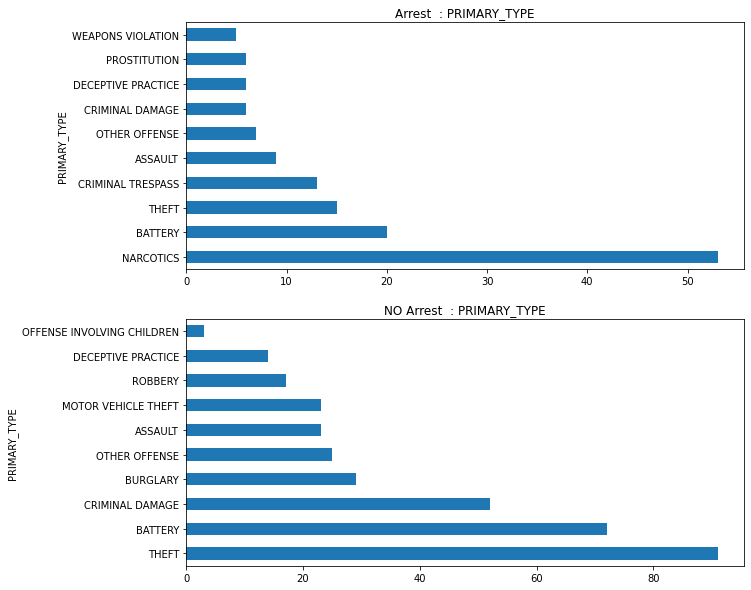

In [21]:
# ARREST AND NON-ARREST BASED ON PRIMARY TYPE
fn_barplot(rel_data,'PRIMARY_TYPE')

     ARREST LOCATION_DESCRIPTION
7      True   GROCERY FOOD STORE
10     True     DEPARTMENT STORE
16     True                OTHER
20     True     DEPARTMENT STORE
23     True   GROCERY FOOD STORE
..      ...                  ...
523    True            RESIDENCE
524    True             SIDEWALK
525    True             SIDEWALK
527    True             SIDEWALK
532    True            APARTMENT

[163 rows x 2 columns]
ARREST  LOCATION_DESCRIPTION          
True    STREET                            37
        SIDEWALK                          33
        RESIDENCE                         17
        APARTMENT                         12
        GROCERY FOOD STORE                 7
        PARKING LOT/GARAGE(NON.RESID.)     6
        ALLEY                              5
        DEPARTMENT STORE                   5
        OTHER                              4
        RESTAURANT                         4
dtype: int64

ARREST  LOCATION_DESCRIPTION          
False   STREET                        

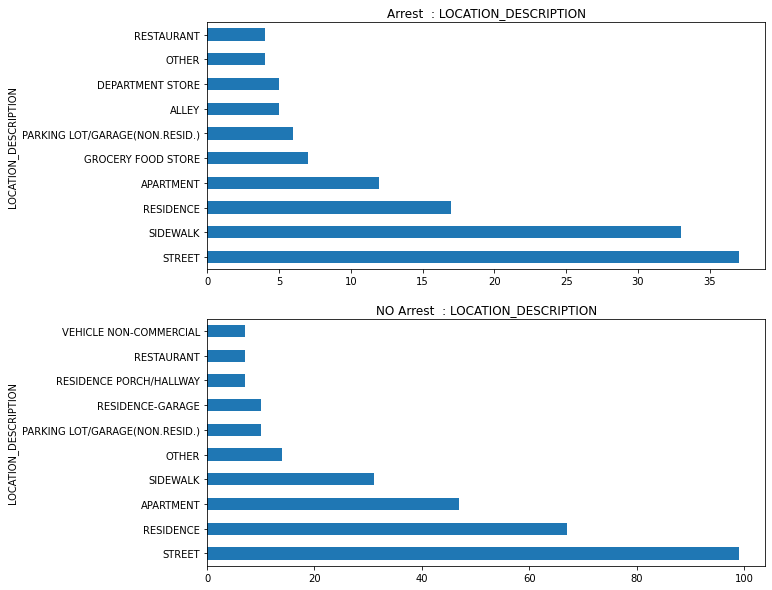

In [22]:
# ARREST AND NON-ARREST BASED ON LOCATION DESCRIPTION
fn_barplot(rel_data,'LOCATION_DESCRIPTION')

     ARREST             DESCRIPTION
7      True            RETAIL THEFT
10     True            RETAIL THEFT
16     True            RETAIL THEFT
20     True            RETAIL THEFT
23     True            RETAIL THEFT
..      ...                     ...
523    True          OBSCENE MATTER
524    True                   OTHER
525    True        LICENSED PREMISE
527    True  INTOXICATING COMPOUNDS
532    True       DOMESTIC VIOLENCE

[163 rows x 2 columns]
ARREST  DESCRIPTION                 
True    POSS: CANNABIS 30GMS OR LESS    25
        SIMPLE                          14
        RETAIL THEFT                     9
        TO LAND                          8
        POSS: HEROIN(WHITE)              7
        POSS: CRACK                      6
        DOMESTIC BATTERY SIMPLE          6
        $500 AND UNDER                   6
        TO PROPERTY                      5
        SOLICIT ON PUBLIC WAY            4
dtype: int64

ARREST  DESCRIPTION            
False   SIMPLE                 

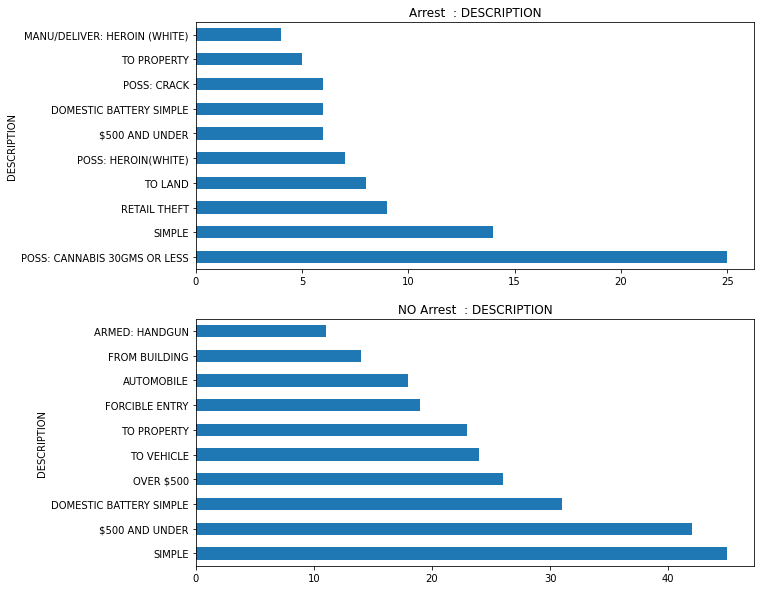

In [23]:
# ARREST AND NON-ARREST BASED ON DESCRIPTION
fn_barplot(rel_data,'DESCRIPTION')

In [24]:
# CONVERTING DATE INTO STRING DATE TIME FORMAT
rel_data['DATE'] = pd.to_datetime(rel_data['DATE'], format='%m/%d/%Y %I:%M:%S %p')
rel_data['DATE']

c:\Users\91983\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0     2004-08-28 17:50:56
1     2004-06-26 12:40:00
2     2011-04-04 05:45:00
3     2010-12-30 16:30:00
4     2016-02-02 19:30:00
              ...        
528   2016-03-01 00:00:00
529   2016-01-29 15:30:00
530   2003-11-08 16:54:15
531   2017-02-06 13:20:00
532   2001-01-11 02:30:41
Name: DATE, Length: 533, dtype: datetime64[ns]

In [25]:
# USING DATE  AS INDEX
rel_data.index=pd.DatetimeIndex(rel_data['DATE']).sort_values()

In [26]:
rel_data.head()

,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,FBICODE,X_COORDINATE,Y_COORDINATE
DATE,,,,,,,,,,
2001-01-11 02:30:41,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,6,1155838.0,1873050.0
2001-01-19 18:39:03,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,6,1152206.0,1906127.0
2001-01-27 16:20:00,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,6,1177436.0,1876313.0
2001-01-28 07:10:00,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,6,1194622.0,1850125.0
2001-02-03 03:00:00,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,6,1155240.0,1860661.0


In [27]:
# Sorted data according to the index i.e. Date
rel_data = rel_data.sort_index()

In [28]:
# EXTRACTIONG DATE, MONTH, YEAR ETC AND MAKING IT SEPERATE COLUMN
s=[]
for d in rel_data['DATE']:
    d = d.strftime("%Y %m %d %I %M %S %p")
    s.append(d.split(" "))
print(s)

[['2004', '08', '28', '05', '50', '56', 'PM'], ['2004', '06', '26', '12', '40', '00', 'PM'], ['2011', '04', '04', '05', '45', '00', 'AM'], ['2010', '12', '30', '04', '30', '00', 'PM'], ['2016', '02', '02', '07', '30', '00', 'PM'], ['2010', '09', '29', '07', '59', '00', 'AM'], ['2016', '11', '30', '01', '15', '00', 'AM'], ['2005', '12', '16', '04', '45', '00', 'PM'], ['2005', '01', '28', '05', '00', '00', 'PM'], ['2004', '05', '13', '02', '15', '00', 'PM'], ['2014', '12', '23', '02', '15', '00', 'PM'], ['2011', '02', '26', '04', '00', '00', 'PM'], ['2012', '04', '15', '07', '30', '00', 'PM'], ['2007', '02', '26', '04', '00', '00', 'PM'], ['2003', '01', '05', '06', '30', '00', 'PM'], ['2015', '08', '24', '07', '30', '00', 'PM'], ['2009', '04', '16', '05', '30', '00', 'PM'], ['2014', '07', '04', '09', '45', '00', 'PM'], ['2013', '06', '04', '09', '00', '00', 'AM'], ['2010', '10', '17', '06', '00', '00', 'PM'], ['2015', '04', '24', '07', '55', '00', 'PM'], ['2008', '05', '06', '03', '20', 

In [29]:
year=[]
date=[]
month=[]
hour=[]
minutes=[]
clock = []
for i in range(len(s)):
    year.append(s[i][0])
    date.append(s[i][2])
    month.append(s[i][1])
    hour.append(s[i][3])
    minutes.append(s[i][4])


In [30]:
rel_data["YEAR"]=year
rel_data["DATE1"]=date
rel_data["MONTH"]=month
rel_data["HOURS"]=hour
rel_data["MINUTES"]=minutes

In [31]:
rel_data.head()

,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,DATE1,MONTH,HOURS,MINUTES
DATE,,,,,,,,,,,,,,,
2001-01-11 02:30:41,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,6,1155838.0,1873050.0,2004,28,08,05,50
2001-01-19 18:39:03,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,6,1152206.0,1906127.0,2004,26,06,12,40
2001-01-27 16:20:00,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,6,1177436.0,1876313.0,2011,04,04,05,45
2001-01-28 07:10:00,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,6,1194622.0,1850125.0,2010,30,12,04,30
2001-02-03 03:00:00,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,6,1155240.0,1860661.0,2016,02,02,07,30


In [32]:
rel_data["WEEK_DAY"] = rel_data["DATE"].map(lambda x: x.dayofweek)

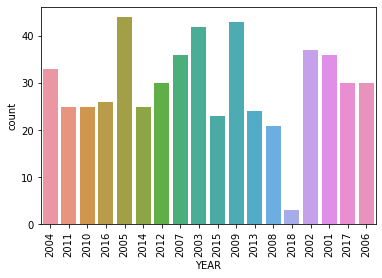

In [33]:

# CRIMES/YEAR
ss = sb.countplot(x=rel_data["YEAR"])
ss.set_xticklabels(ss.get_xticklabels(),rotation=90)
plt.show()

In [34]:
# NUMBER OF CRIMES IN EACH MONTH OF THE YEAR
def plotting(rel_data,year1):
    rel = (rel_data[rel_data['YEAR']==year1]['YEAR'])
    # rel = (rel_data[rel_data['MONTH']==]['MONTH'])
    grouped_data = rel_data.groupby(['MONTH', rel])['DATE'].count().unstack()
    sorted_data = grouped_data.sum(axis=1).sort_values(ascending=False)
    grouped_data_sorted = grouped_data.loc[sorted_data.index]
    ax = grouped_data_sorted.plot(marker='o', figsize=(10, 5))  
    # rel_data.groupby(['MONTH','YEAR'])['DATE'].count().unstack().plot(marker='o',figsize=(12,10))
    plt.xticks(rotation=90)

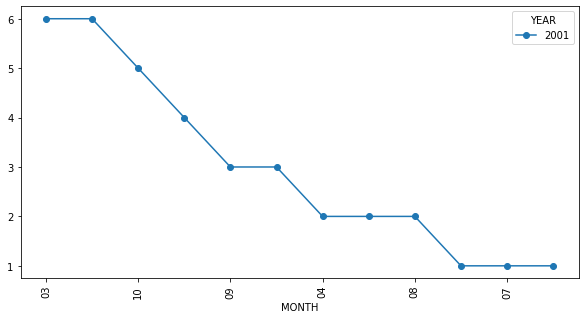

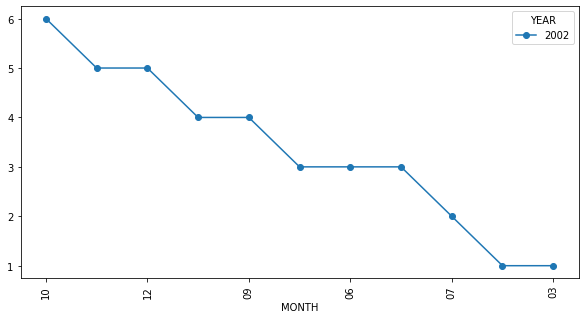

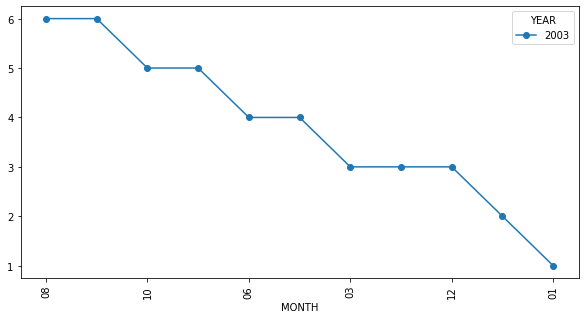

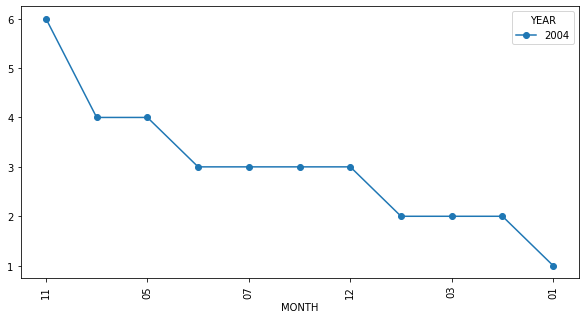

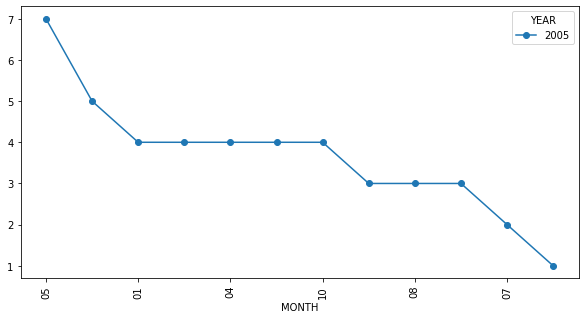

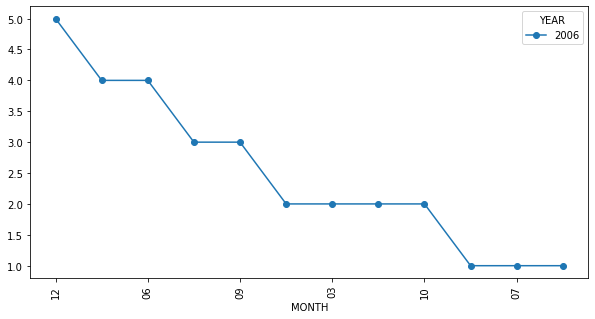

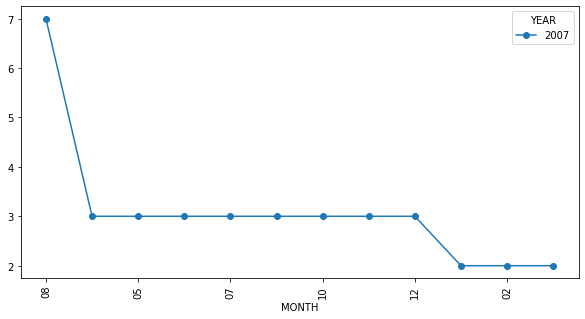

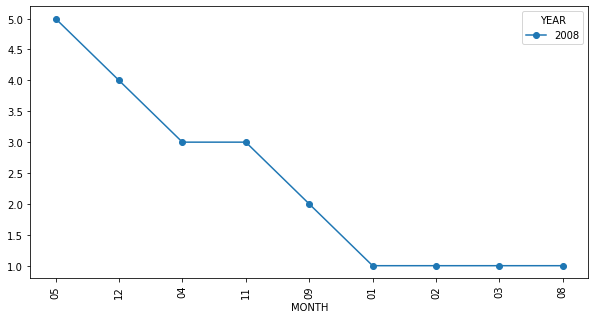

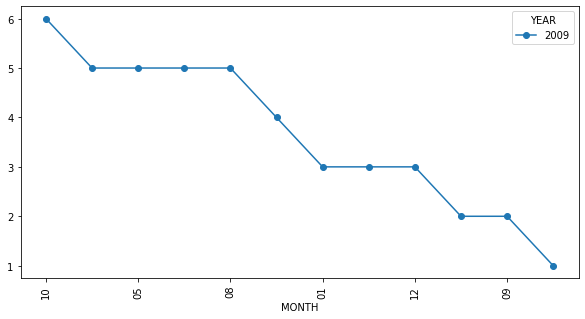

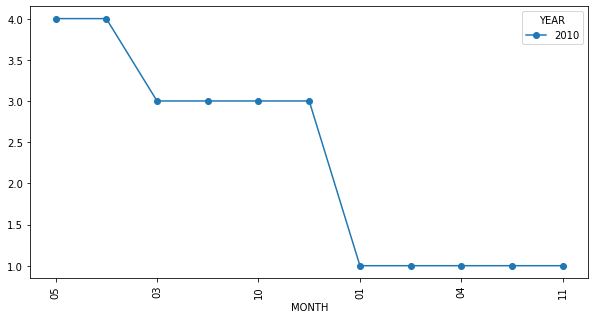

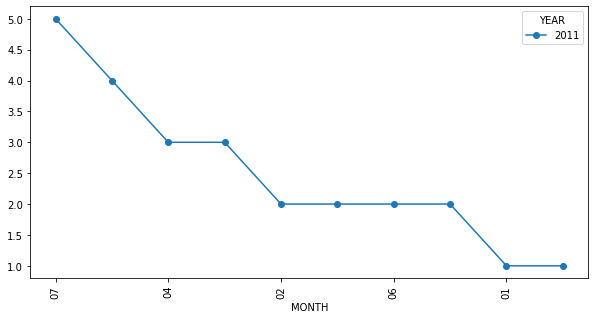

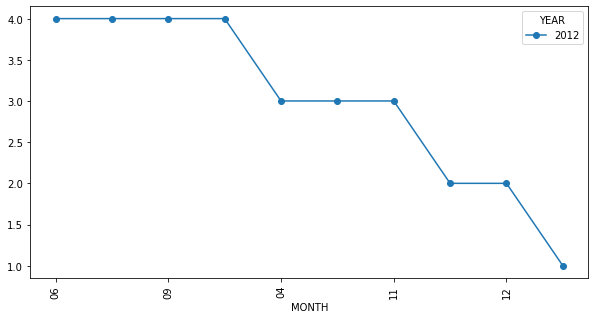

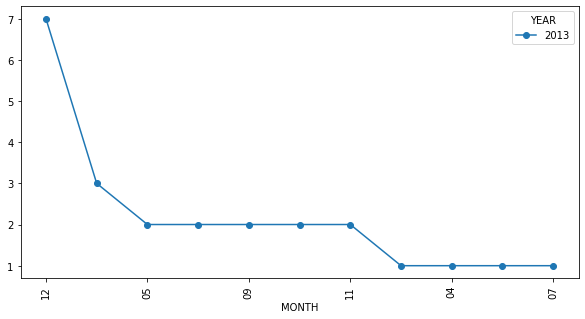

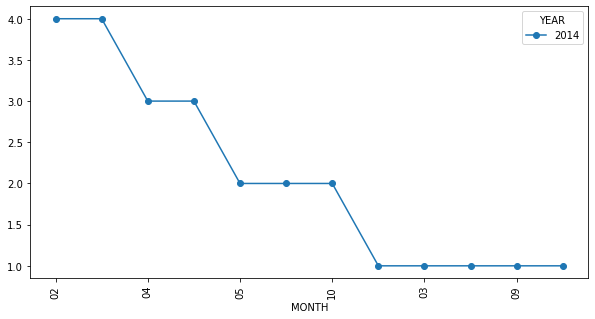

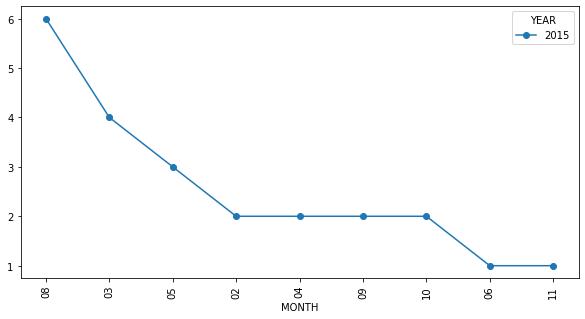

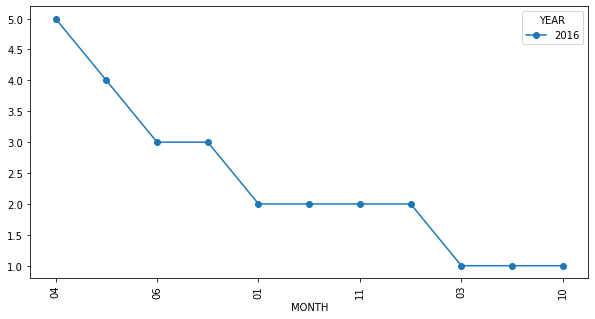

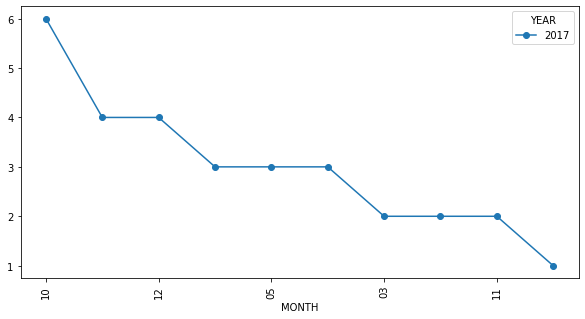

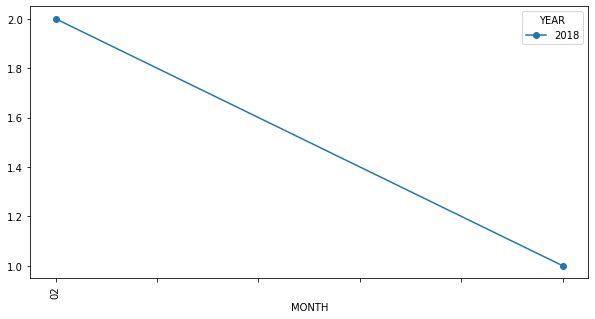

In [35]:
year_plot = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for j in year_plot:
    plotting(rel_data,j)

In [36]:
# MAPPING OF DAYS
day_week = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
rel_data["WEEK_DAY1"] = rel_data["WEEK_DAY"].map(day_week)
rel_data["WEEK_DAY1"].value_counts()

Friday       82
Sunday       82
Saturday     81
Wednesday    80
Monday       71
Thursday     70
Tuesday      67
Name: WEEK_DAY1, dtype: int64

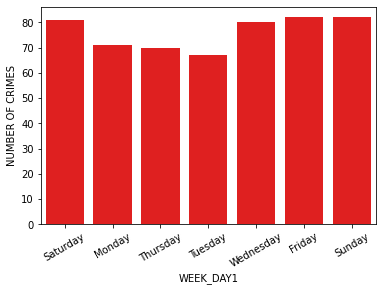

<AxesSubplot:xlabel='MONTH'>

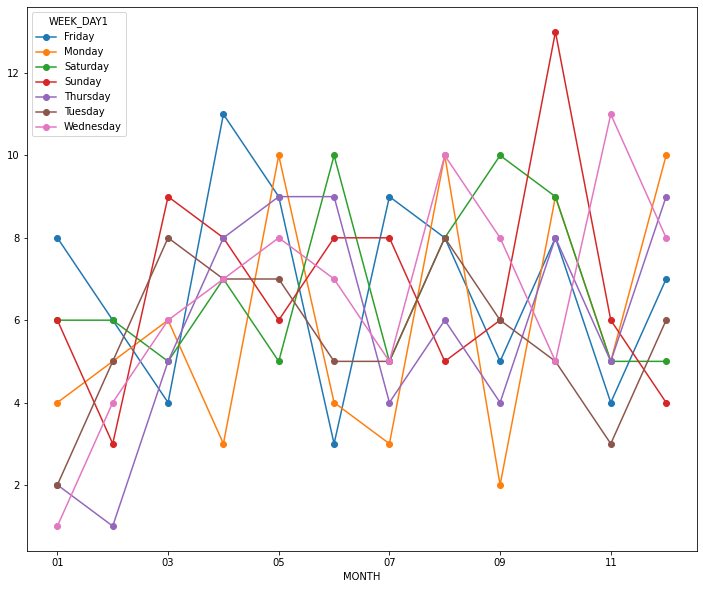

In [37]:
# NUMBER OF CRIMES ON WEEK DAYS
sb.countplot(x=rel_data["WEEK_DAY1"],color="red")
plt.ylabel("NUMBER OF CRIMES")
plt.xticks(rotation=30)
plt.show()

rel_data.groupby(['MONTH','WEEK_DAY1'])['DATE'].count().unstack().plot(marker='o',figsize=(12,10))


In [38]:
# NUMBER OF CRIMES BY PRIMARY TYPE IN EACH YEAR
def plotting1(rel_data,year1,j):
    rel2 = (rel_data[rel_data['YEAR']==year1]['YEAR'])
    grouped_data = rel_data.groupby(['PRIMARY_TYPE', rel2])['DATE'].count()[:7].unstack()
    sorted_data = grouped_data.sum(axis=1).sort_values(ascending=False)
    grouped_data_sorted = grouped_data.loc[sorted_data.index]
    ax = grouped_data_sorted.plot(marker='o', figsize=(10, 5)) 
    plt.xticks(rotation=90)

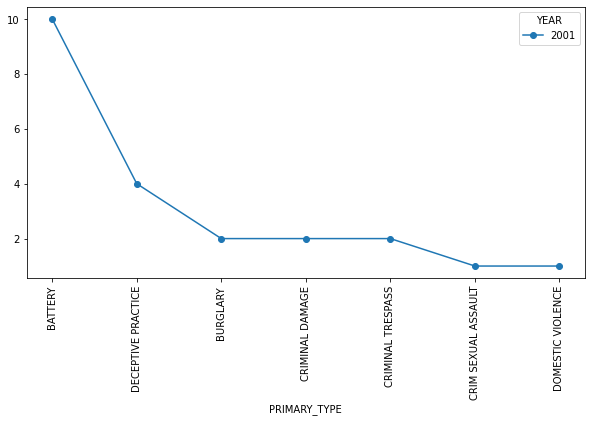

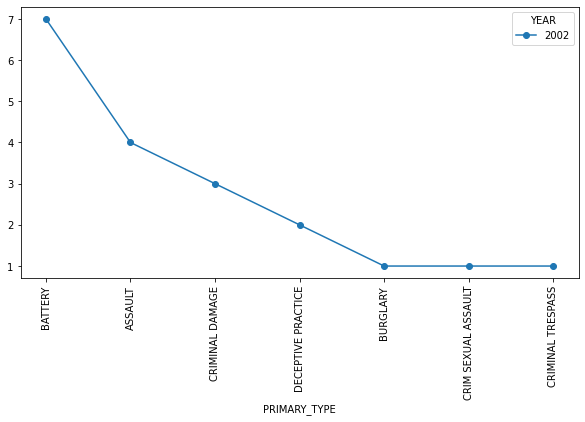

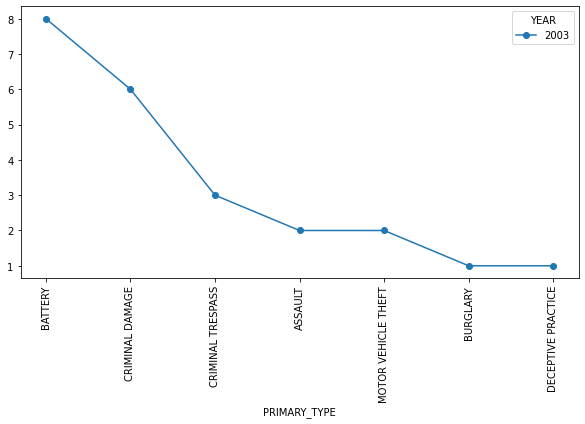

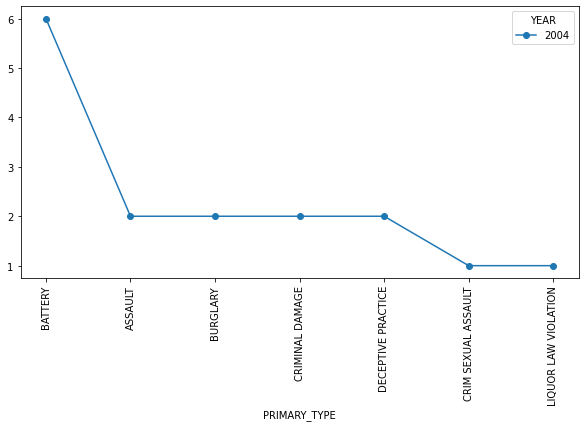

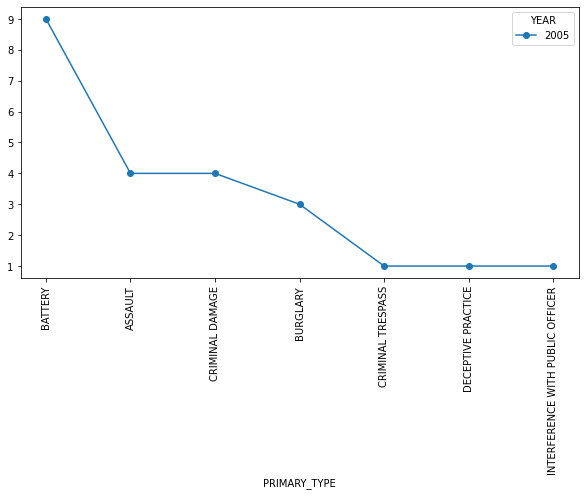

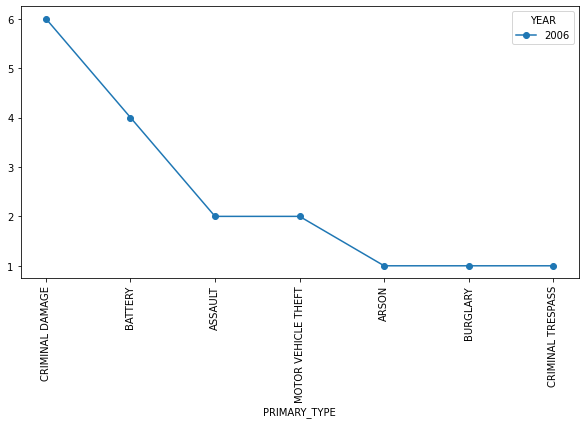

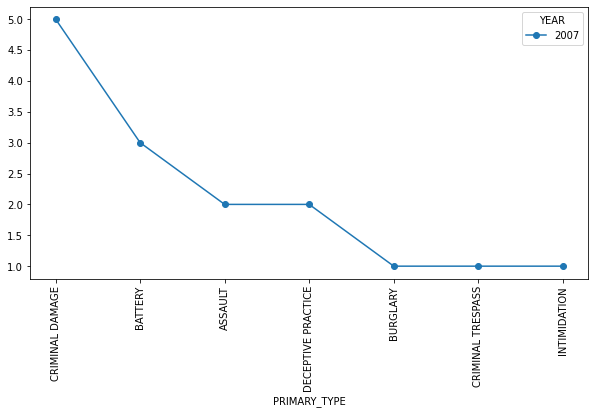

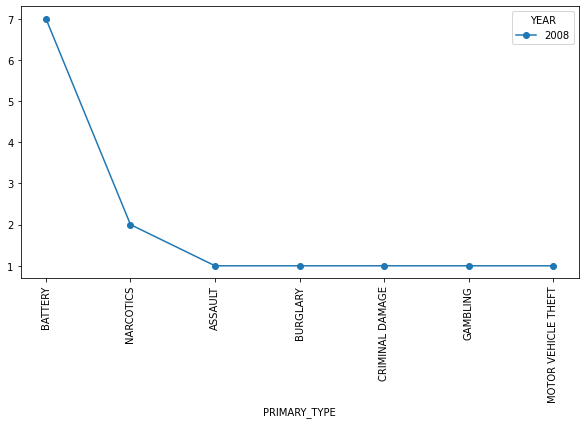

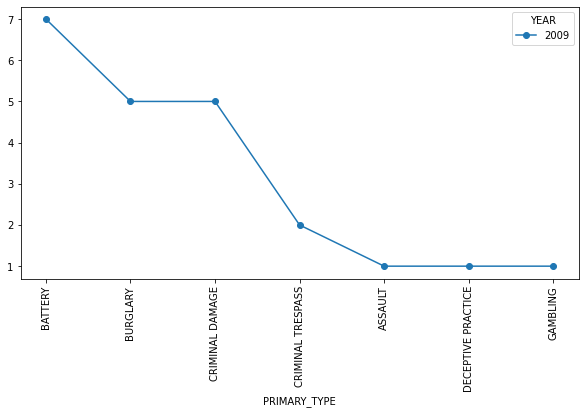

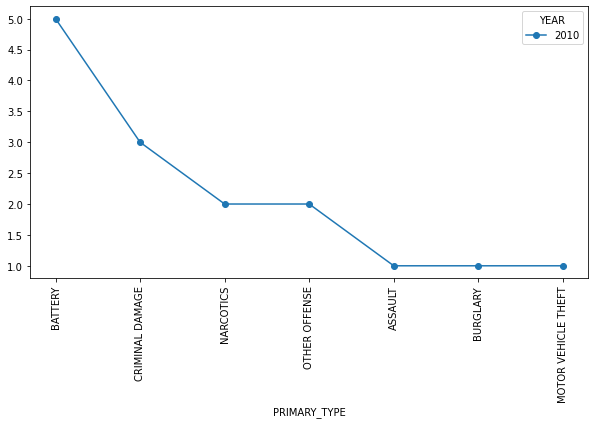

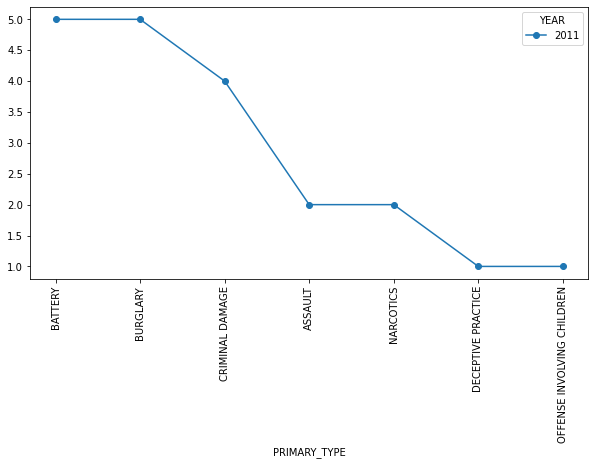

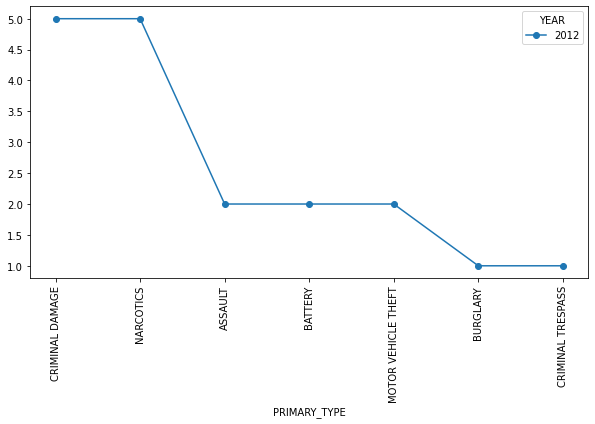

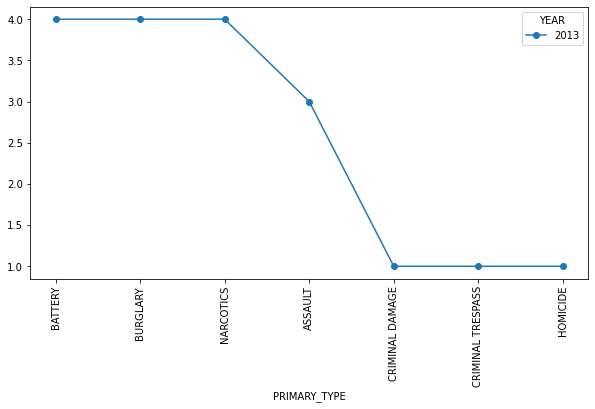

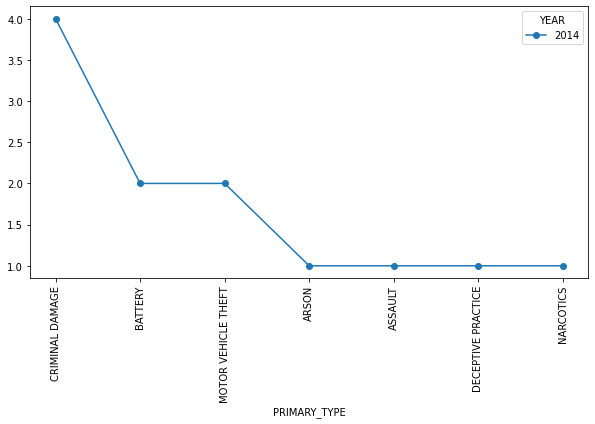

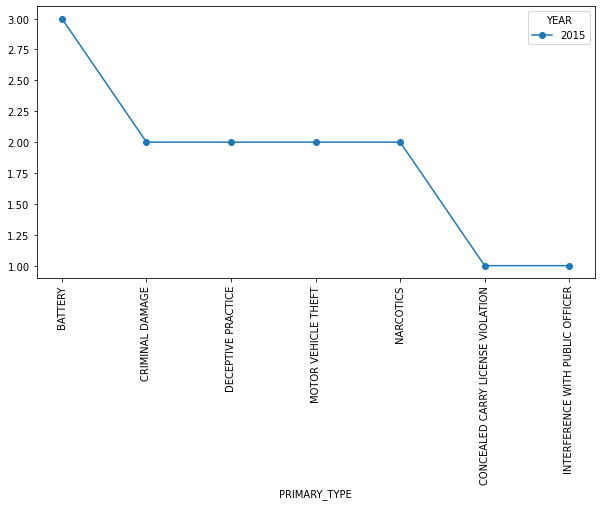

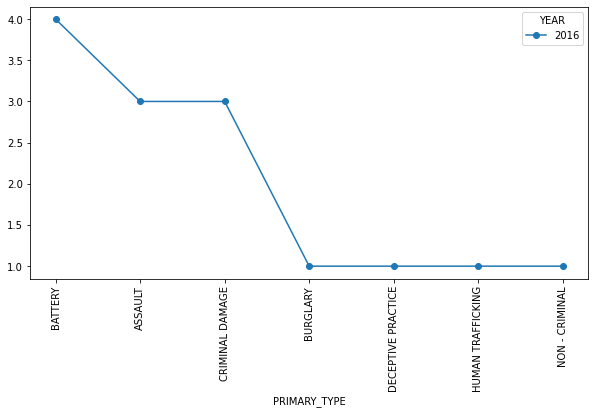

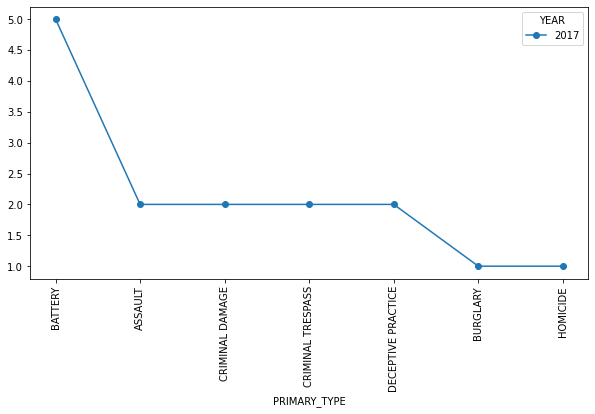

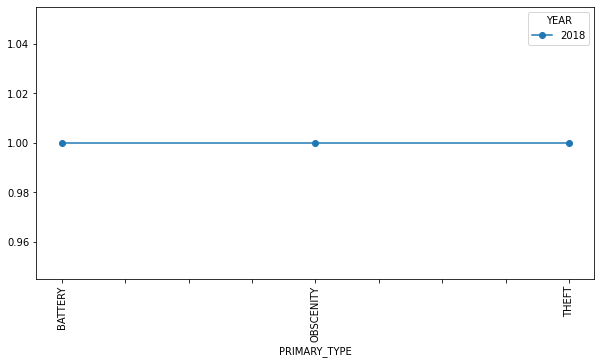

In [39]:
year_plot = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for i,j in enumerate(year_plot):
    plotting1(rel_data,j,i)

In [40]:
# NUMBER OF CRIMES IN EACH HOURS OF THE YEAR
def plotting2(rel_data,year1,j):
    rel_op = (rel_data[rel_data['YEAR']==year1]['YEAR'])
    grouped_data = rel_data.groupby(['HOURS', rel_op])['DATE'].count().unstack()
    sorted_data = grouped_data.sum(axis=1)
    grouped_data_sorted = grouped_data.loc[sorted_data.index]
    ax = grouped_data_sorted.plot(marker='o', figsize=(10, 5)) 
    plt.xticks(rotation=90)

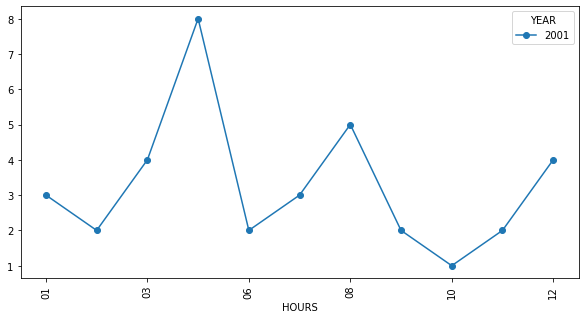

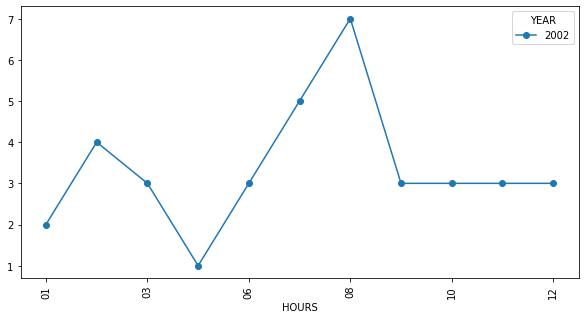

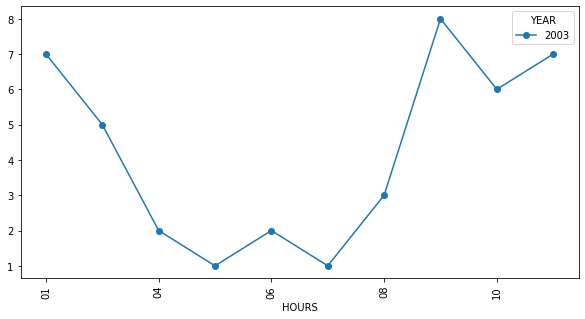

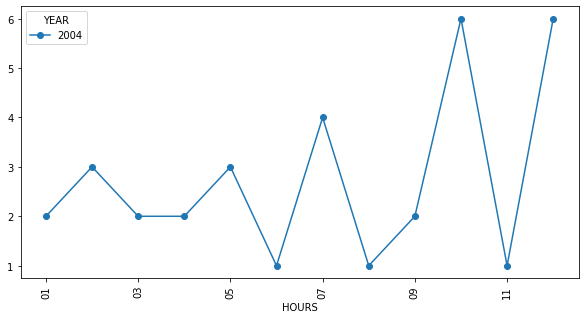

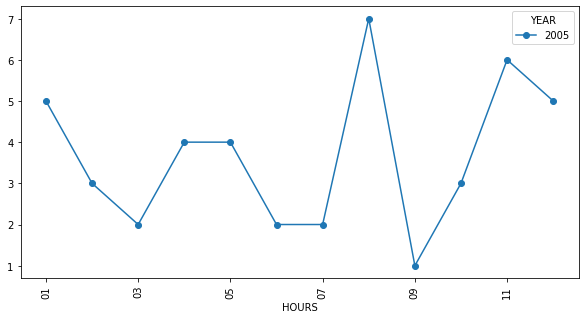

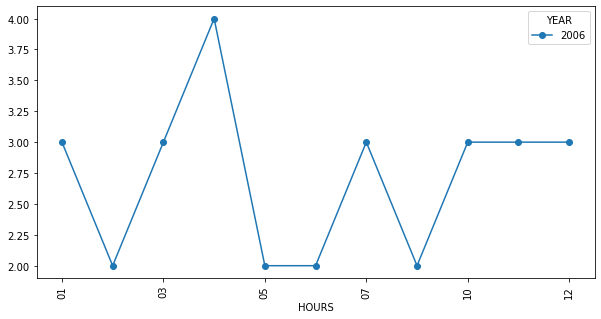

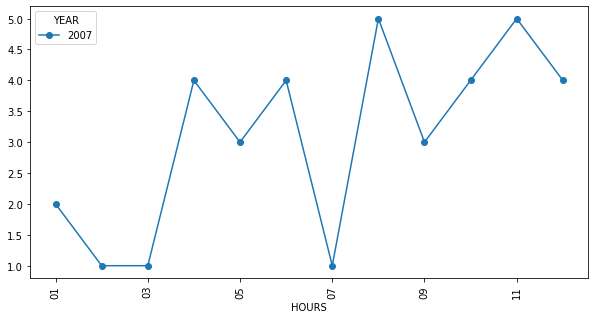

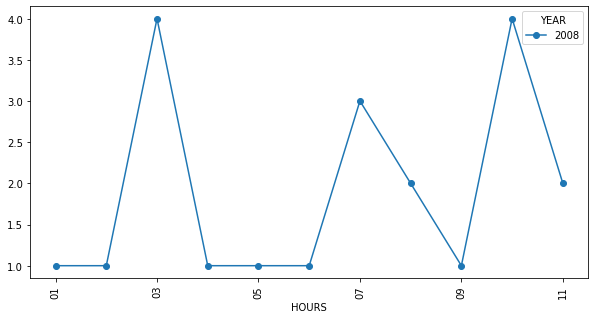

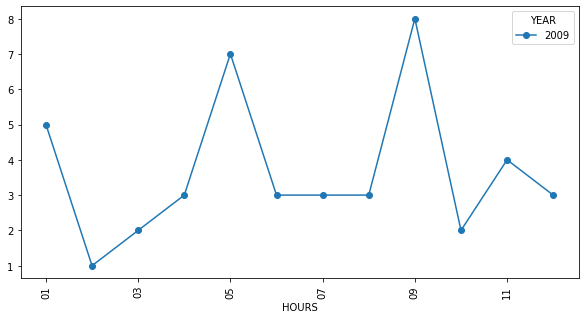

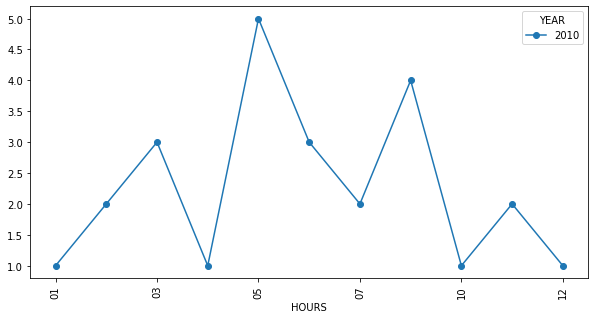

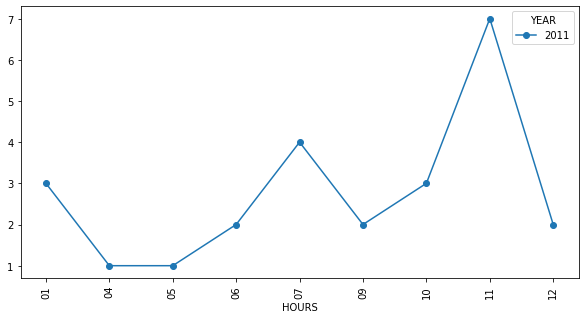

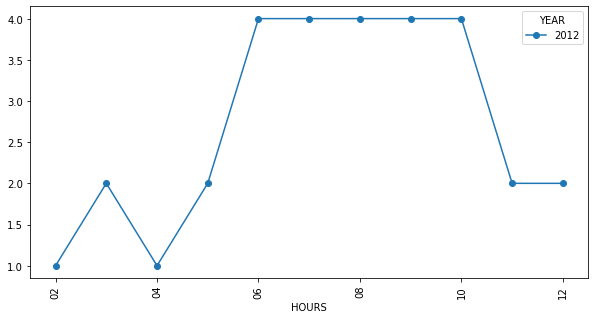

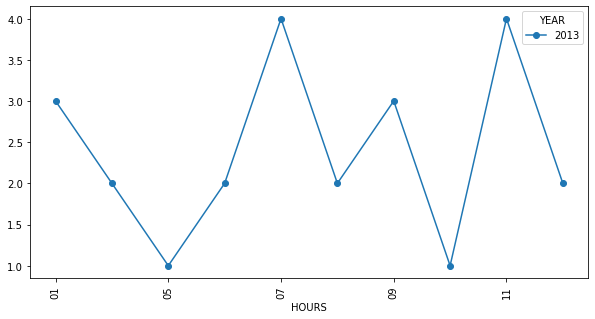

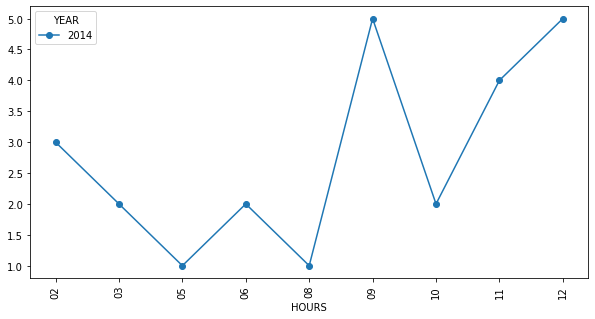

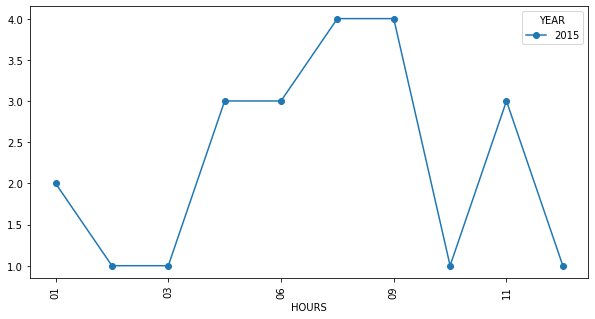

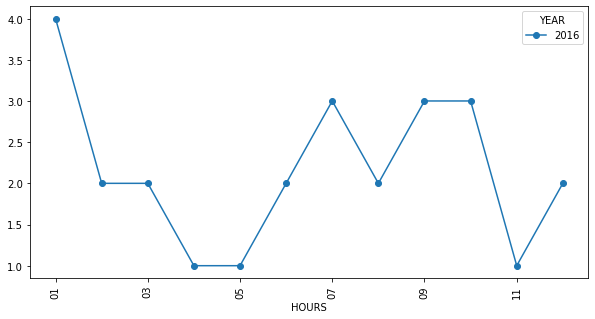

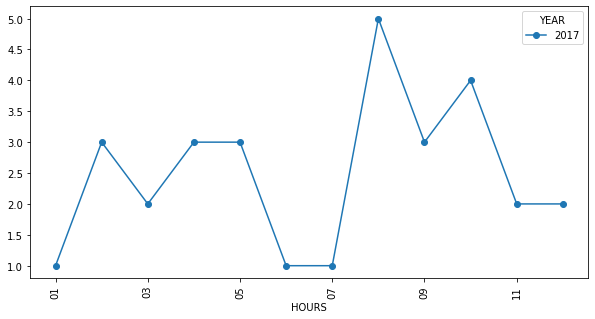

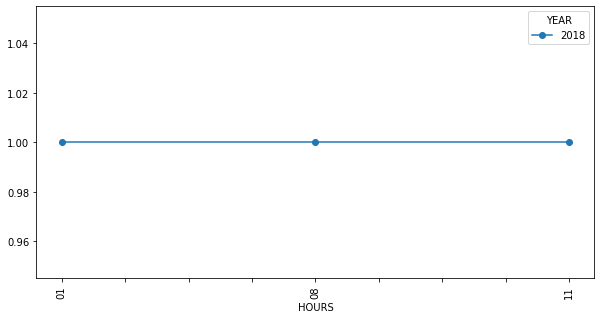

In [41]:
year_plot = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for i,j in enumerate(year_plot):
    plotting2(rel_data,j,i)

In [42]:
# NUMBER OF CRIMES IN EACH MONTH BY PRIMARY TYPE
def plotting3(rel_data,month,j):
    rel_op1 = (rel_data[rel_data['MONTH']==month])['MONTH']
    grouped_data = rel_data.groupby(['PRIMARY_TYPE', rel_op1])['DATE'].count().unstack()
    sorted_data = grouped_data.sum(axis=1).sort_values(ascending=False)
    grouped_data_sorted = grouped_data.loc[sorted_data.index]
    ax = grouped_data_sorted.plot(marker='o', figsize=(10, 5)) 
    plt.xticks(rotation=90)
    plt.ylabel("Count")

ValueError: cannot reindex from a duplicate axis

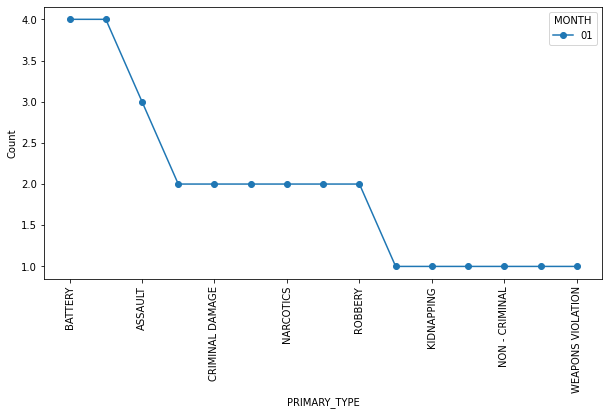

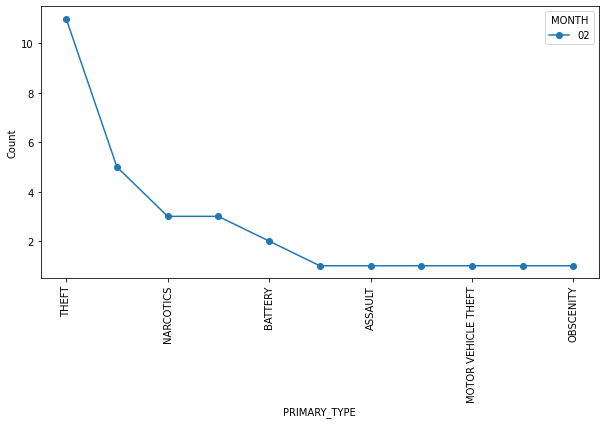

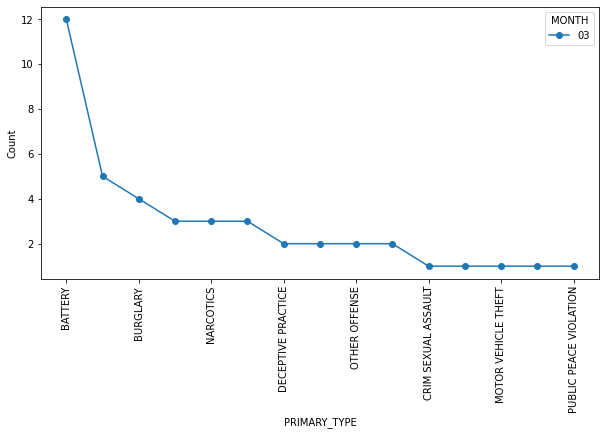

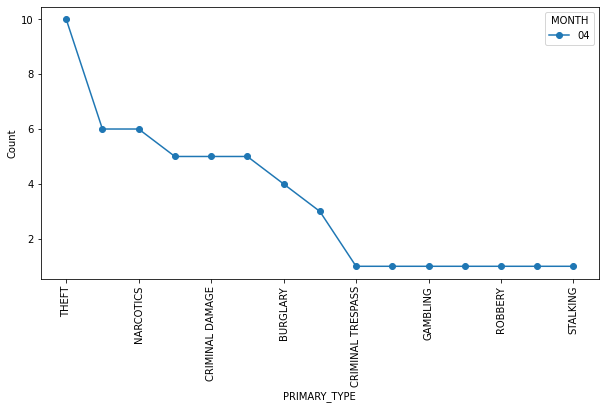

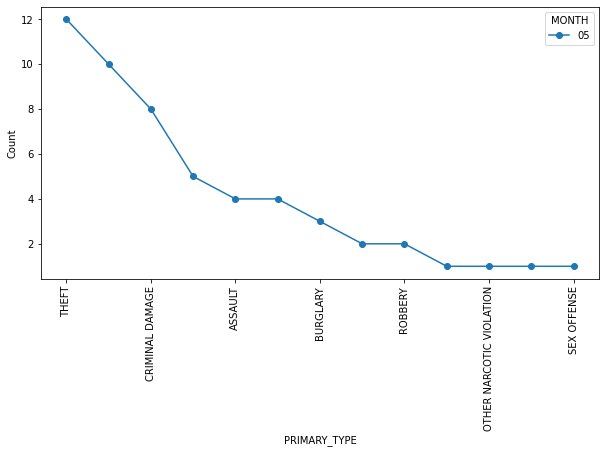

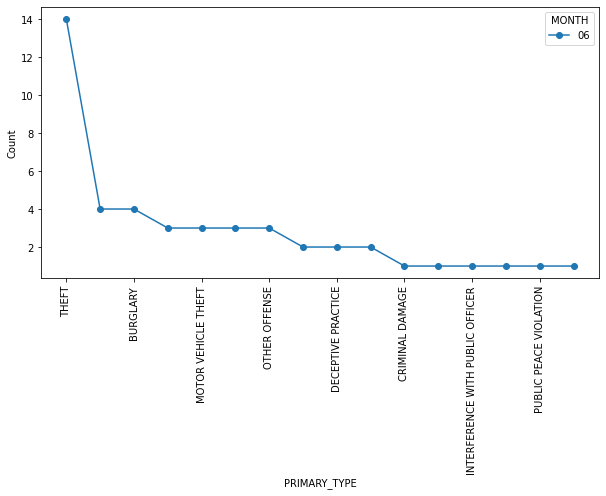

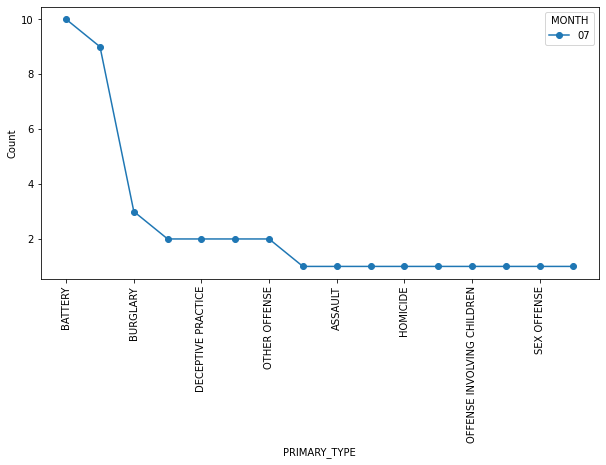

In [43]:
year_plot = ['01','02','03','04','05','06','07','08','09','10','11','12']
for i,j in enumerate(year_plot):
    plotting3(rel_data,j,i)

In [44]:
rel_data.head()

,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,DATE1,MONTH,HOURS,MINUTES,WEEK_DAY,WEEK_DAY1
DATE,,,,,,,,,,,,,,,,,
2001-01-11 02:30:41,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,6,1155838.0,1873050.0,2004,28,08,05,50,5,Saturday
2001-01-19 18:39:03,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,6,1152206.0,1906127.0,2004,26,06,12,40,5,Saturday
2001-01-27 16:20:00,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,6,1177436.0,1876313.0,2011,04,04,05,45,0,Monday
2001-01-28 07:10:00,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,6,1194622.0,1850125.0,2010,30,12,04,30,3,Thursday
2001-02-03 03:00:00,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,6,1155240.0,1860661.0,2016,02,02,07,30,1,Tuesday


In [45]:
# setting the date-time to the index of the dataframe
# rel_data.index=pd.DatetimeIndex(rel_data['DATE'])

Text(0, 0.5, 'Number of Crimes')

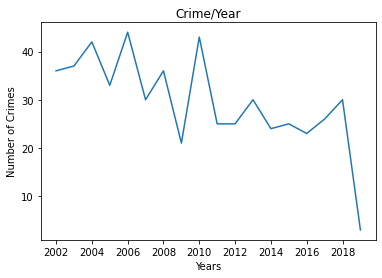

In [46]:
# plt.figure(figsize=(40,20))
plt.plot(rel_data.resample('Y').size())
plt.title("Crime/Year")
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

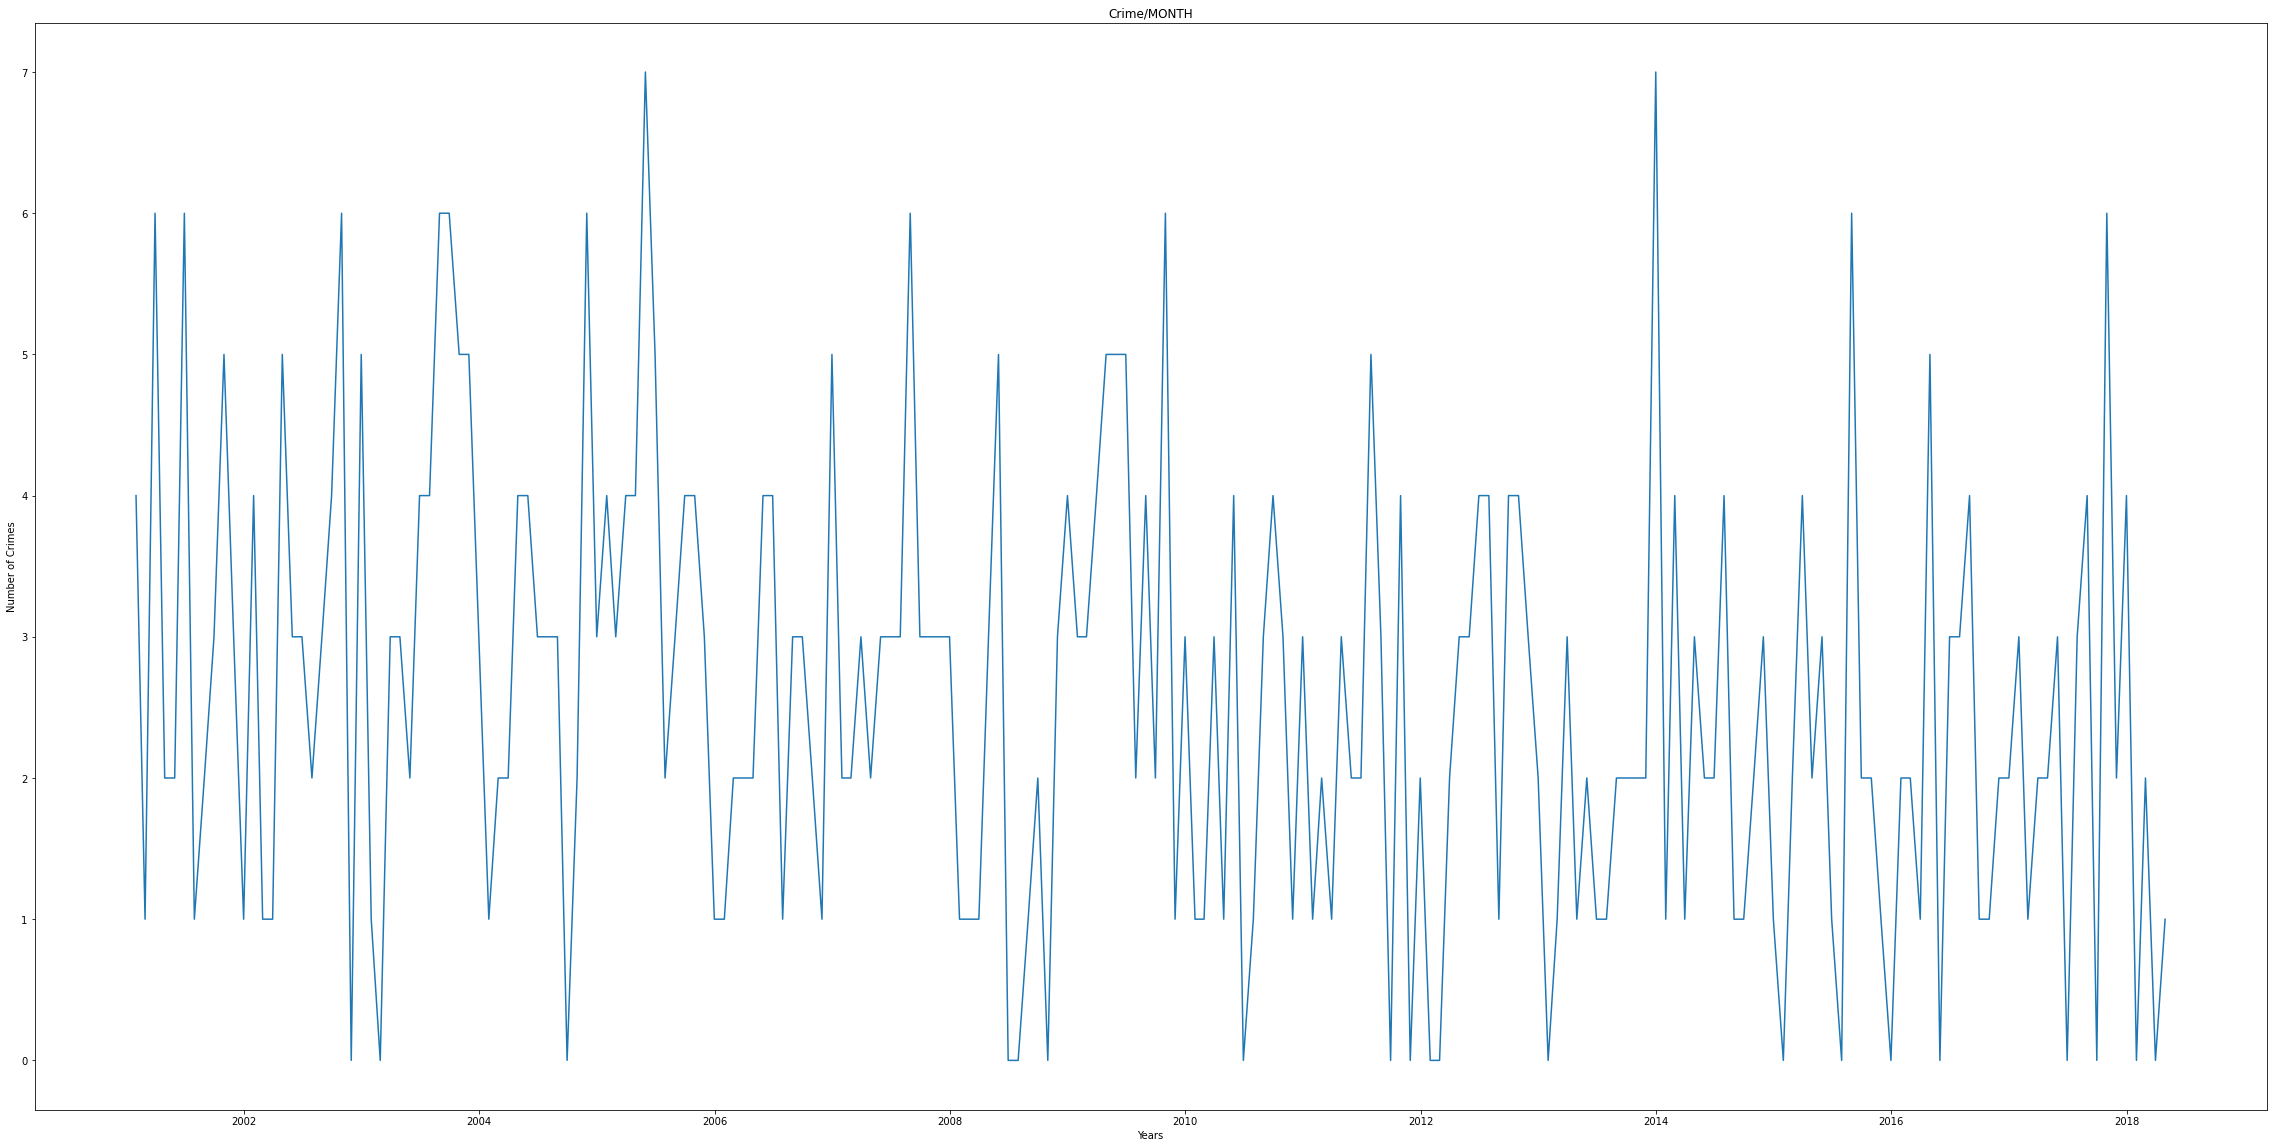

In [47]:
plt.figure(figsize=(40,20))
plt.plot(rel_data.resample('M').size())
plt.title("Crime/MONTH")
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

FUTURE PREDICTION BASED ON HOURLY CRIMES

In [48]:
chi_proph = rel_data.resample('H').size().reset_index()

In [49]:
chi_proph

,DATE,0
0,2001-01-11 02:00:00,1
1,2001-01-11 03:00:00,0
2,2001-01-11 04:00:00,0
3,2001-01-11 05:00:00,0
4,2001-01-11 06:00:00,0
...,...,...
151051,2018-04-05 21:00:00,0
151052,2018-04-05 22:00:00,0
151053,2018-04-05 23:00:00,0
151054,2018-04-06 00:00:00,0


In [50]:
chi_proph.columns=['Date','crime_count']
chi_proph

,Date,crime_count
0,2001-01-11 02:00:00,1
1,2001-01-11 03:00:00,0
2,2001-01-11 04:00:00,0
3,2001-01-11 05:00:00,0
4,2001-01-11 06:00:00,0
...,...,...
151051,2018-04-05 21:00:00,0
151052,2018-04-05 22:00:00,0
151053,2018-04-05 23:00:00,0
151054,2018-04-06 00:00:00,0


In [51]:
chi_proph_df = pd.DataFrame(chi_proph)
chi_proph_df

,Date,crime_count
0,2001-01-11 02:00:00,1
1,2001-01-11 03:00:00,0
2,2001-01-11 04:00:00,0
3,2001-01-11 05:00:00,0
4,2001-01-11 06:00:00,0
...,...,...
151051,2018-04-05 21:00:00,0
151052,2018-04-05 22:00:00,0
151053,2018-04-05 23:00:00,0
151054,2018-04-06 00:00:00,0


In [52]:
chi_proph_df.columns

Index(['Date', 'crime_count'], dtype='object')

In [53]:
chicago_prophet_df_final = chi_proph_df.rename(columns={'Date':'ds', 'crime_count':'y'})
chicago_prophet_df_final

,ds,y
0,2001-01-11 02:00:00,1
1,2001-01-11 03:00:00,0
2,2001-01-11 04:00:00,0
3,2001-01-11 05:00:00,0
4,2001-01-11 06:00:00,0
...,...,...
151051,2018-04-05 21:00:00,0
151052,2018-04-05 22:00:00,0
151053,2018-04-05 23:00:00,0
151054,2018-04-06 00:00:00,0


In [54]:
proph_obj = Prophet()
proph_obj.fit(chicago_prophet_df_final)

10:15:51 - cmdstanpy - INFO - Chain [1] start processing
10:16:01 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = proph_obj.make_future_dataframe(periods=1200)
forcaste = proph_obj.predict(future)

In [56]:
forcaste

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-11 02:00:00,0.005170,-0.075406,0.075697,0.005170,0.005170,-0.002839,-0.002839,-0.002839,-0.001331,...,0.000020,0.000020,0.000020,-0.001527,-0.001527,-0.001527,0.0,0.0,0.0,0.002331
1,2001-01-11 03:00:00,0.005170,-0.075807,0.078766,0.005170,0.005170,-0.003404,-0.003404,-0.003404,-0.001879,...,0.000004,0.000004,0.000004,-0.001530,-0.001530,-0.001530,0.0,0.0,0.0,0.001766
2,2001-01-11 04:00:00,0.005170,-0.075036,0.076462,0.005170,0.005170,-0.003758,-0.003758,-0.003758,-0.002215,...,-0.000010,-0.000010,-0.000010,-0.001532,-0.001532,-0.001532,0.0,0.0,0.0,0.001412
3,2001-01-11 05:00:00,0.005170,-0.076001,0.075347,0.005170,0.005170,-0.003870,-0.003870,-0.003870,-0.002312,...,-0.000023,-0.000023,-0.000023,-0.001535,-0.001535,-0.001535,0.0,0.0,0.0,0.001299
4,2001-01-11 06:00:00,0.005170,-0.080430,0.075932,0.005170,0.005170,-0.003709,-0.003709,-0.003709,-0.002137,...,-0.000035,-0.000035,-0.000035,-0.001538,-0.001538,-0.001538,0.0,0.0,0.0,0.001460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152251,2021-07-15 01:00:00,0.003047,-0.077970,0.076797,0.001411,0.004424,-0.001294,-0.001294,-0.001294,-0.000620,...,0.000036,0.000036,0.000036,-0.000710,-0.000710,-0.000710,0.0,0.0,0.0,0.001753
152252,2021-07-16 01:00:00,0.003047,-0.070646,0.079264,0.001411,0.004426,-0.001305,-0.001305,-0.001305,-0.000620,...,0.000101,0.000101,0.000101,-0.000786,-0.000786,-0.000786,0.0,0.0,0.0,0.001742
152253,2021-07-17 01:00:00,0.003047,-0.076178,0.076624,0.001410,0.004428,-0.001219,-0.001219,-0.001219,-0.000620,...,0.000252,0.000252,0.000252,-0.000850,-0.000850,-0.000850,0.0,0.0,0.0,0.001829
152254,2021-07-18 01:00:00,0.003048,-0.072752,0.080975,0.001410,0.004430,-0.001423,-0.001423,-0.001423,-0.000620,...,0.000099,0.000099,0.000099,-0.000902,-0.000902,-0.000902,0.0,0.0,0.0,0.001624


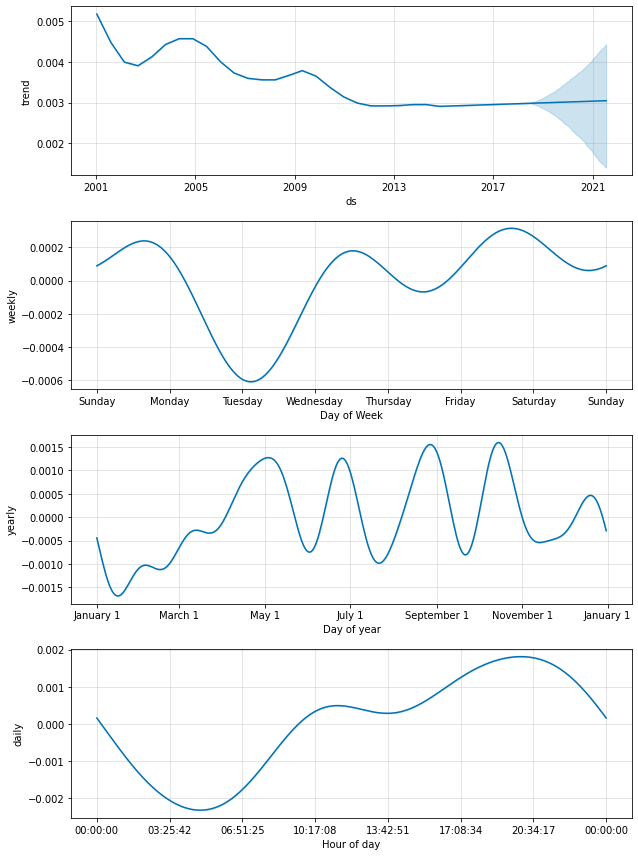

In [57]:
fig = proph_obj.plot_components(forcaste)

FUTURE PREDICTION BASED ON DAILY CRIMES

In [58]:
chi_proph = rel_data.resample('D').size().reset_index()

In [59]:
chi_proph

,DATE,0
0,2001-01-11,1
1,2001-01-12,0
2,2001-01-13,0
3,2001-01-14,0
4,2001-01-15,0
...,...,...
6290,2018-04-02,0
6291,2018-04-03,0
6292,2018-04-04,0
6293,2018-04-05,0


In [60]:
chi_proph.columns=['Date','crime_count']
chi_proph

,Date,crime_count
0,2001-01-11,1
1,2001-01-12,0
2,2001-01-13,0
3,2001-01-14,0
4,2001-01-15,0
...,...,...
6290,2018-04-02,0
6291,2018-04-03,0
6292,2018-04-04,0
6293,2018-04-05,0


In [61]:
chi_proph_df = pd.DataFrame(chi_proph)
chi_proph_df

,Date,crime_count
0,2001-01-11,1
1,2001-01-12,0
2,2001-01-13,0
3,2001-01-14,0
4,2001-01-15,0
...,...,...
6290,2018-04-02,0
6291,2018-04-03,0
6292,2018-04-04,0
6293,2018-04-05,0


In [62]:
chicago_prophet_df_final = chi_proph_df.rename(columns={'Date':'ds', 'crime_count':'y'})
chicago_prophet_df_final

,ds,y
0,2001-01-11,1
1,2001-01-12,0
2,2001-01-13,0
3,2001-01-14,0
4,2001-01-15,0
...,...,...
6290,2018-04-02,0
6291,2018-04-03,0
6292,2018-04-04,0
6293,2018-04-05,0


In [63]:
proph_obj = Prophet()
proph_obj.fit(chicago_prophet_df_final)

10:16:33 - cmdstanpy - INFO - Chain [1] start processing
10:16:34 - cmdstanpy - INFO - Chain [1] done processing


In [128]:
future = proph_obj.make_future_dataframe(periods=1200)
forcaste = proph_obj.predict(future)

In [129]:
forcaste

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,3.353763,0.550245,4.299469,3.353763,3.353763,-0.945501,-0.945501,-0.945501,-0.945501,-0.945501,-0.945501,0.0,0.0,0.0,2.408262
1,2001-02-28,3.346907,0.592804,4.374997,3.346907,3.346907,-0.915646,-0.915646,-0.915646,-0.915646,-0.915646,-0.915646,0.0,0.0,0.0,2.431261
2,2001-03-31,3.339317,1.249561,5.050009,3.339317,3.339317,-0.176469,-0.176469,-0.176469,-0.176469,-0.176469,-0.176469,0.0,0.0,0.0,3.162848
3,2001-04-30,3.331972,1.784375,5.546704,3.331972,3.331972,0.291887,0.291887,0.291887,0.291887,0.291887,0.291887,0.0,0.0,0.0,3.623858
4,2001-05-31,3.324381,2.045942,5.764717,3.324381,3.324381,0.592260,0.592260,0.592260,0.592260,0.592260,0.592260,0.0,0.0,0.0,3.916641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2021-08-08,1.519117,0.059712,3.626097,1.519109,1.519124,0.300137,0.300137,0.300137,0.300137,0.300137,0.300137,0.0,0.0,0.0,1.819254
1404,2021-08-09,1.518872,0.116761,3.840212,1.518864,1.518879,0.421173,0.421173,0.421173,0.421173,0.421173,0.421173,0.0,0.0,0.0,1.940045
1405,2021-08-10,1.518627,0.187673,4.012257,1.518619,1.518634,0.544333,0.544333,0.544333,0.544333,0.544333,0.544333,0.0,0.0,0.0,2.062960
1406,2021-08-11,1.518382,0.328922,4.148155,1.518375,1.518390,0.666776,0.666776,0.666776,0.666776,0.666776,0.666776,0.0,0.0,0.0,2.185158


In [130]:
chicago_prophet_df_final['y'][:208]

0      1
1      0
2      0
3      0
4      0
      ..
203    0
204    0
205    0
206    0
207    0
Name: y, Length: 208, dtype: int64

In [131]:
forcaste.shape

(1408, 16)

In [133]:
from sklearn.metrics import mean_absolute_error
y_true = chicago_prophet_df_final['y'][:1408].values
y_pred = forcaste['yhat'][:].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.726


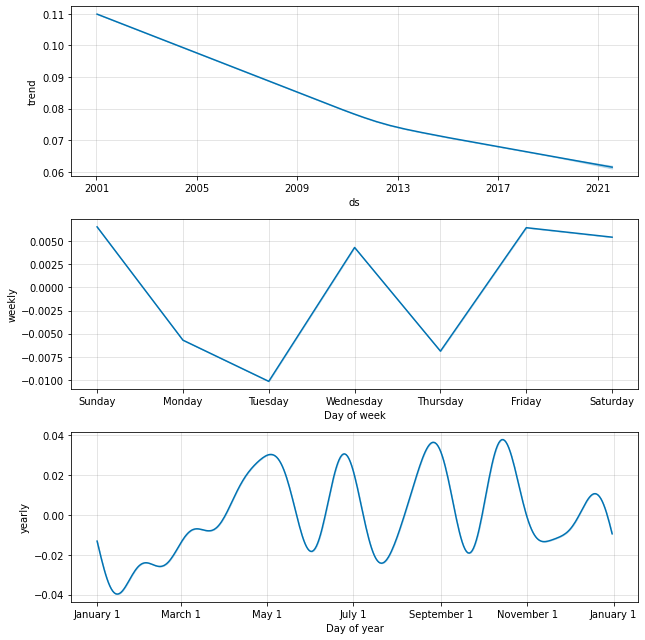

In [ ]:
fig = proph_obj.plot_components(forcaste)

FUTURE PREDICTION BY MONTH

In [ ]:
chi_proph = rel_data.resample('M').size().reset_index()
chi_proph.columns=['ds','y']
chi_proph_df1 = pd.DataFrame(chi_proph)
chi_proph_df = pd.DataFrame(chi_proph)
chi_proph_df
# chicago_prophet_df_final = chi_proph_df.rename(columns={'Date':'ds', 'crime_count':'y'})


,ds,y
0,2001-01-31,4
1,2001-02-28,1
2,2001-03-31,6
3,2001-04-30,2
4,2001-05-31,2
...,...,...
203,2017-12-31,4
204,2018-01-31,0
205,2018-02-28,2
206,2018-03-31,0


In [ ]:
proph_obj = Prophet()
proph_obj.fit(chi_proph_df)

10:16:36 - cmdstanpy - INFO - Chain [1] start processing
10:16:36 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = proph_obj.make_future_dataframe(periods=1200)
forcaste = proph_obj.predict(future)

In [ ]:
forcaste

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,3.353763,0.374869,4.382787,3.353763,3.353763,-0.945501,-0.945501,-0.945501,-0.945501,-0.945501,-0.945501,0.0,0.0,0.0,2.408262
1,2001-02-28,3.346907,0.537893,4.259902,3.346907,3.346907,-0.915646,-0.915646,-0.915646,-0.915646,-0.915646,-0.915646,0.0,0.0,0.0,2.431261
2,2001-03-31,3.339317,1.331931,5.077037,3.339317,3.339317,-0.176469,-0.176469,-0.176469,-0.176469,-0.176469,-0.176469,0.0,0.0,0.0,3.162848
3,2001-04-30,3.331972,1.770860,5.560644,3.331972,3.331972,0.291887,0.291887,0.291887,0.291887,0.291887,0.291887,0.0,0.0,0.0,3.623858
4,2001-05-31,3.324381,1.901862,5.729383,3.324381,3.324381,0.592260,0.592260,0.592260,0.592260,0.592260,0.592260,0.0,0.0,0.0,3.916641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2021-08-08,1.519117,-0.155039,3.616254,1.519108,1.519124,0.300137,0.300137,0.300137,0.300137,0.300137,0.300137,0.0,0.0,0.0,1.819254
1404,2021-08-09,1.518872,0.154830,3.971166,1.518864,1.518879,0.421173,0.421173,0.421173,0.421173,0.421173,0.421173,0.0,0.0,0.0,1.940045
1405,2021-08-10,1.518627,0.193803,3.912875,1.518619,1.518634,0.544333,0.544333,0.544333,0.544333,0.544333,0.544333,0.0,0.0,0.0,2.062960
1406,2021-08-11,1.518382,0.325458,4.132527,1.518374,1.518390,0.666776,0.666776,0.666776,0.666776,0.666776,0.666776,0.0,0.0,0.0,2.185158


In [ ]:
forcaste.shape

(1408, 16)

In [ ]:
chi_proph_df1.shape

(208, 2)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = chi_proph_df1['y'][:].values
y_pred = forcaste['yhat'][:208].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.193


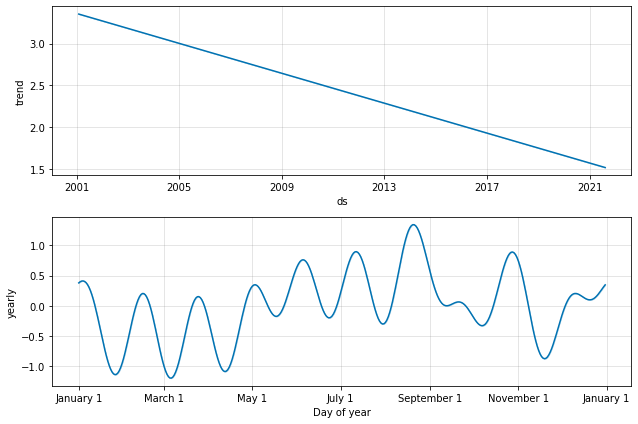

In [ ]:
fig = proph_obj.plot_components(forcaste)